# CLASSIFICATION Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM CBB3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### Problem Statement

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### Data overview
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

# Team Supervisor
- Chris Barnett

# TEAM CBB3 MEMBERS
- 1. Elelwani Tshikovhi (Team Leader);
- 2. Katlego Maponya (Team coordinator) ;
- 3. Musa Mashaba ;
- 4. Zwothandwa Kunene ;
- 5. Sinethemba Nongqoto;
- 6. Desree Maleka


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

In [1]:
#%pip install gensim
#conda install -c conda-forge wordcloud
#%pip install demoji

# Import all the  **libraries**

In [1]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
# Modelling
from tqdm import tqdm
#rom gensim.models.doc2vec import LabeledSentence 
import gensim
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from collections import defaultdict, Counter
from nltk.tokenize import TweetTokenizer
from scipy import stats 
# Metrics for Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Downloads
nltk.download(['punkt','stopwords'])
%matplotlib inline
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Download NLTK Corpora
Some of the `nltk` text processing methods introduced in this train involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, we need to first download the corpora we're going use, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

In [2]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

pip install comet version control

In [3]:
%pip3 install comet_ml

**Comet** provides a central place for my team to track their ML experiments and models so we can seamlessly compare and share experiments, debug and stop underperforming models

In [3]:
# Import comet_ml at the top 
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/54bc4a9f5c2240f1bd1d243dddb98ff3



*   [Trello Link](https://trello.com/b/2KvEPRJi/advanced-classificatin-team-cbb3-week-1)
*   [Link to comet](https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/view/new/panels)
*   [Link to Github](https://github.com/TEAMCBB3Classificationpredict)
*   [Link to streamlit]( http://34.244.129.101:5000)
*   [link to presentation](https://docs.google.com/presentation/d/19E1pbrp_lXfBG3FyOsz43QQRqq-qd7eGtp00w7nESCs/edit#slide=id.p)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

The training and testing data respectively are loaded as Pandas DataFrames

In [4]:
# Load train data
train = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/train.csv')

# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/test_with_no_labels.csv')

In [5]:
#To view the first 10 row of the data to see how it looks like
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---


### Shape of Dataframe

In [6]:
#getting the shape of the dataframes
print('Train shape : rows, columns:',train.shape)
print('test shape : rows, columns:',test.shape)

Train shape : rows, columns: (15819, 3)
test shape : rows, columns: (10546, 2)


The **train** has `15819 rows and 3 columns!` while **test data** has `10546 rows and  just 2 columns!`

In [7]:
#cheking the full information of rows ans columns and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Train data has 2 numerical culumns and 1 categorical column

The statistical summary doesnt no give out alot of information since most of the data is ordinal we can see by the 25%,50% and 75% quartile the value is 1 , means 1 is the most occuring sentiment in this data set 

### Check for nulls

In [8]:
train.isnull().sum() #checking for null values

sentiment    0
message      0
tweetid      0
dtype: int64

NO empty cells or values 

In [9]:
# Create class distribution dataframe
sentiment_counts = train.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts


,sentiment,counts
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


Most occuring sentiment is 1 and least occuring setiment is -1 which means there is a high percentage of tweet that are for climate change than anti climate change

### Histogram and density plot

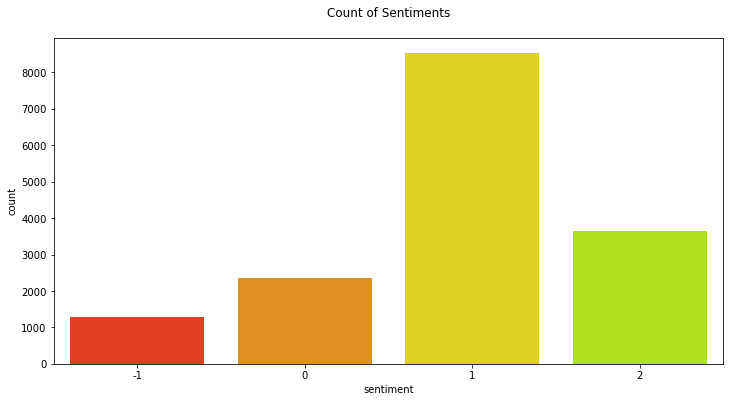

In [19]:
#bar graph to show the semtiments 
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train, palette="prism")
plt.title('Count of Sentiments\n')
plt.show()

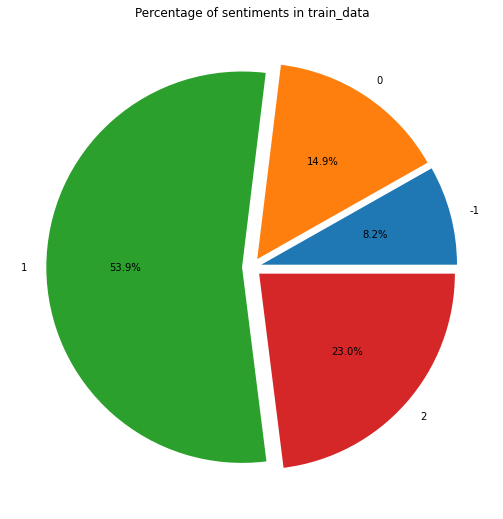

In [20]:
#pie chart to show the sentiment percentages 
senti = train.groupby('sentiment', as_index=False).count()
fig = plt.subplots(figsize=(14,9))
plt.pie(senti['message'], labels = senti['sentiment'].astype('str'), autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Percentage of sentiments in train_data')
plt.show()

In [13]:
df_train = train.copy() #Making a copy so changes doesnt affect original data

<Figure size 1440x1080 with 0 Axes>

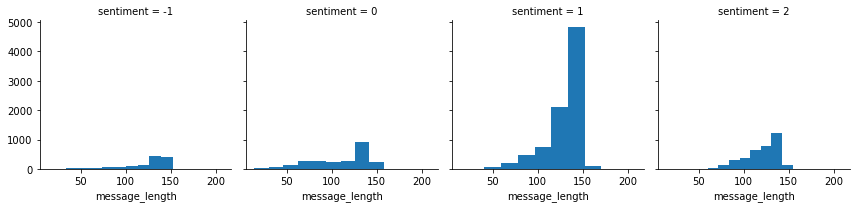

In [30]:
#Plot the distribution of the tweet length per csentiment using a histogram.
plt.figure(figsize=(20,15))
df_train['message_length'] = df_train['message'].apply(len)
g = sns.FacetGrid(df_train,col='sentiment')
g.map(plt.hist,'message_length') 
plt.show()

Sentiment 1 has the highest distribution of long message length highly concentrated between 110-150 and sentiment -1 has the least distribution of message length

Plot Of Top 15 message Of Tweet

c:\Users\f5468981\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\f5468981\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


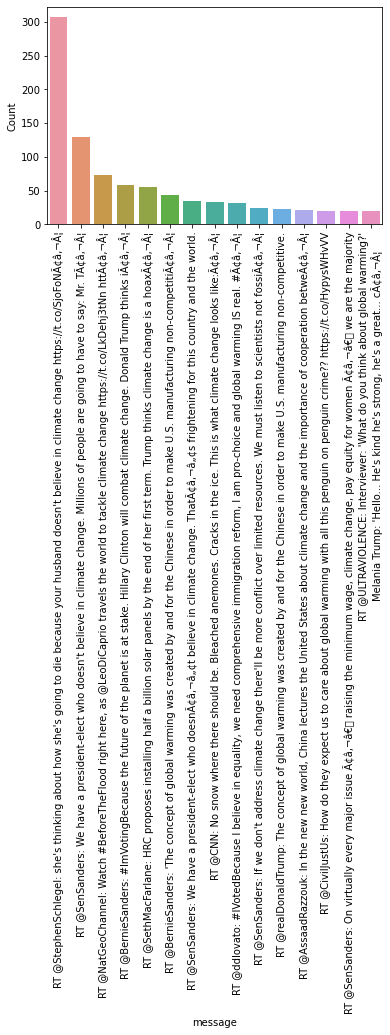

In [23]:
loc_df=df_train['message'].value_counts().reset_index().rename(columns={'index':'message','message':'Count'}).sort_values('Count',ascending=False).head(15)
sns.barplot(loc_df['message'],loc_df['Count'])
plt.xticks(rotation = 90)
plt.show()

#  BOX PLOT 

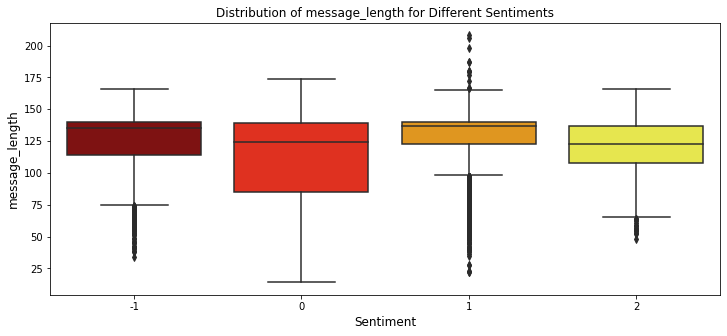

In [26]:
#box plot to show the distribution of message length per sentiment
fig,axis = plt.subplots(figsize=(12,5)) 
sns.boxplot(x='sentiment',y='message_length',data=df_train,palette=("hot")) 
plt.title('Distribution of message_length for Different Sentiments', fontsize = 12) 
plt.xlabel('Sentiment', fontsize = 12) 
plt.ylabel('message_length', fontsize = 12) 
plt.show()

# Insights
### sentiments -1,1 and 2 have outliers 
- sentiment 1 has a lot of unsual short and long message length which can be seen as outliers 
- sentiment 0 messages length is perfectly skewed to the left   with  no outliers
- sentiment -1,0,1 are skewed tothe left and 2 is not 

<AxesSubplot:>

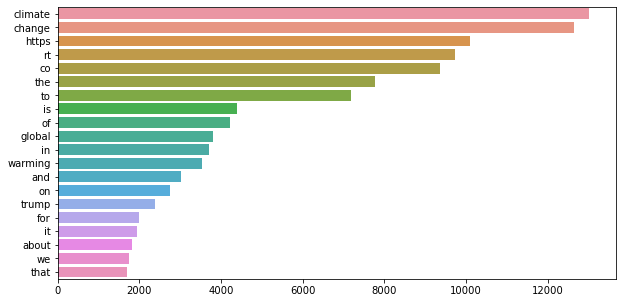

In [31]:
# Visualize current state of data
# Function returns a unigram
def top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)#creating a bag of words 
    sum_words = bag_of_words.sum(axis=0) #sum of the bag of words
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_unigram = top_tweet_unigrams(df_train['message'])[:20]
x,y = map(list,zip(*top_tweet_unigram))
sns.barplot(x=y, y=x)

 *climate* is the most used single word  in this tweets data follwed by change.
 reasons why 
 - most twitter users would used climate change as a # 
 this apply for both unigram and bigram

<AxesSubplot:>

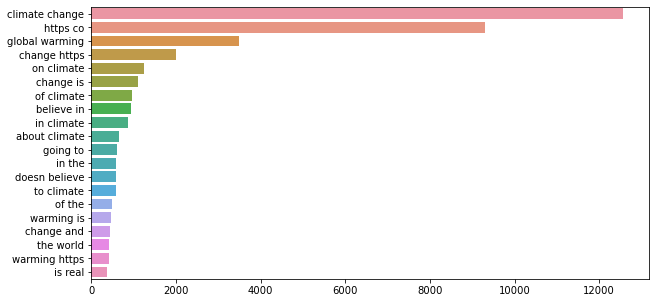

In [20]:
# Function returns a bigram
def top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)#creating a bag of words 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigram = top_tweet_bigrams(df_train['message'])[:20]
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(x=y,y=x)

### Non graphical multivariate analysis

Calculating the correlation to see if there is a relationship between sentimentnts .tweetid and messagelenth. We can see below  there is come good correlation between sentiments and tweet length

In [32]:
df_train.corr()

,sentiment,tweetid,message_length
sentiment,1.000000,-0.003758,0.052893
tweetid,-0.003758,1.000000,0.005774
message_length,0.052893,0.005774,1.000000


### Multivariate analysis: Graphical


#### Heatmap

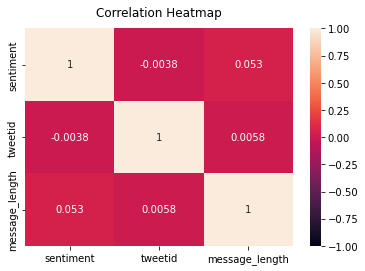

In [33]:
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

for the test data

In [34]:
test.info() #checking the number of rows and columns and data type for the test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [204]:
df = train.copy() #getting a copy of the ooriginal data to do data cleaning

# **Tweets Data Preprocessing and Cleaning** 
The preprocessing of the text data is an essential step as it makes the raw text ready for modelling , we remove  noisy and inconsistent data

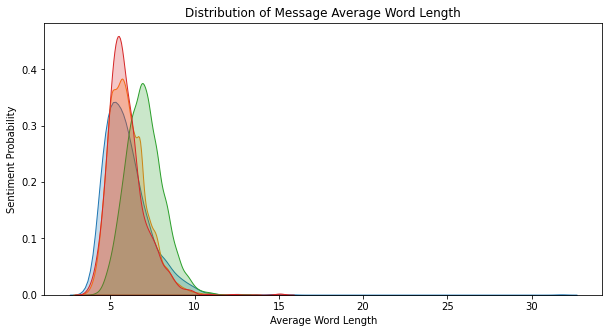

In [205]:
#Function to find average word length 
def avg_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

# Broadcast to text column
df['avg_word_length'] = df['message'].apply(avg_word_length)

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(df['avg_word_length'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['avg_word_length'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['avg_word_length'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['avg_word_length'][df['sentiment'] == -1], shade = True, label = 'Anti')

# Set title
plt.title('Distribution of Message Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Sentiment Probability')

# Plot graphs
plt.show()

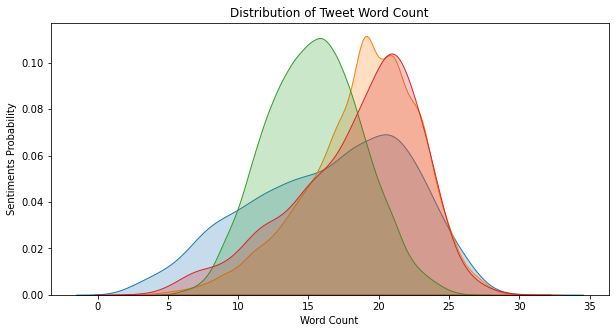

In [206]:
# Column for the number of words in message
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(df['word_count'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['word_count'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['word_count'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['word_count'][df['sentiment'] == -1], shade = True, label = 'Anti')

# Set title and plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiments Probability')
plt.show()

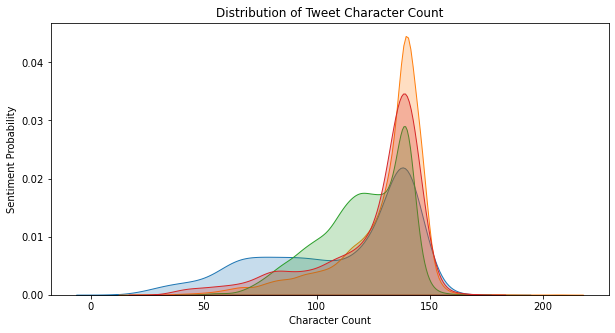

In [207]:
# Column for the number of characters in a message
df['character_count'] = df['message'].apply(lambda x: len(x))

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(df['character_count'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['character_count'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['character_count'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['character_count'][df['sentiment'] == -1], shade = True, label = 'Anti')


# Set title and plot
plt.title('Distribution of Tweet Character Count')
plt.xlabel('Character Count')
plt.ylabel('Sentiment Probability')
plt.show()

In [208]:
# convert sentiment  numbers into text
def sentiment(df):

    sentiment = df['sentiment']
    sentiment_class = []
    for i in sentiment:
        if i == 1:
            sentiment_class.append('Pro')
        elif i == 0:
            sentiment_class.append('Neutral')
        elif i == -1:
            sentiment_class.append('Anti')
        else:
            sentiment_class.append('News')

    df['sentiment'] = sentiment_class
    return df
df = sentiment(df)
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,6.421053,19,140
1,Pro,It's not like we lack evidence of anthropogeni...,126103,5.300000,10,62
2,News,RT @RawStory: Researchers say we have three ye...,698562,6.421053,19,140
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5.666667,15,99
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,5.833333,18,122
5,Pro,Worth a read whether you do or don't believe i...,425577,6.928571,14,110
6,Pro,RT @thenation: Mike Pence doesn’t believe in g...,294933,6.500000,16,119
7,Pro,RT @makeandmendlife: Six big things we can ALL...,992717,5.652174,23,152
8,Pro,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,4.600000,25,139
9,Pro,RT @paigetweedy: no offense… but like… how do ...,260471,4.933333,15,88


In [209]:
# Extract the hashtags from the tweets
def extract_hashtags(df):

    df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
    df['hashtags'].apply(lambda x: np.nan if len(x) == 0 else [x.lower() for x in x])
    return df
    
extract_hashtags(df)


,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,6.421053,19,140,[]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,5.300000,10,62,[]
2,News,RT @RawStory: Researchers say we have three ye...,698562,6.421053,19,140,[]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5.666667,15,99,[#TodayinMaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,5.833333,18,122,[#ElectionNight]
...,...,...,...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,5.409091,22,140,[]
15815,News,RT @washingtonpost: How climate change could b...,17856,8.230769,13,119,[]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,6.052632,19,133,[]
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,5.142857,21,128,[#Agenda2030.]


# Extracting hashtags for each Sentiment

In [210]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [211]:
News = hashtag_extract(df['message'][df['sentiment'] == 'News'])
Pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
Neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
Anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])

In [212]:
#creating the list
News = sum(News, []) # summing all the hashtags per sentiment
Pro = sum(Pro, [])
Neutral = sum(Neutral, [])
Anti = sum(Anti,[])


### Checking for Top 10 most used Hashtags for each Sentiments

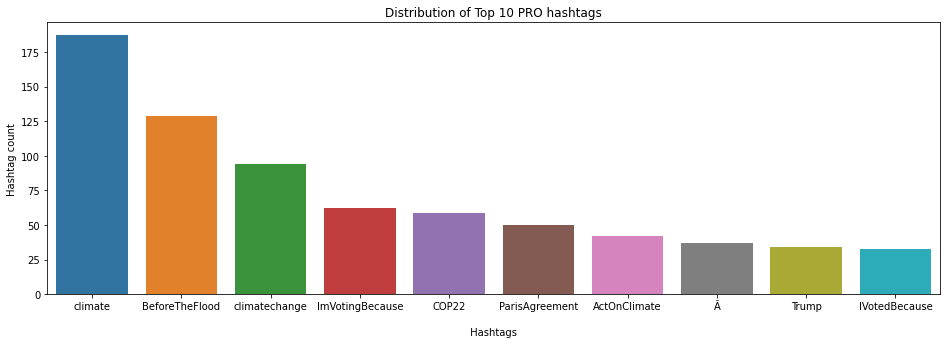

In [213]:
# making frequency distribution top 10 News hashtags
k = nltk.FreqDist(Pro)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 PRO hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

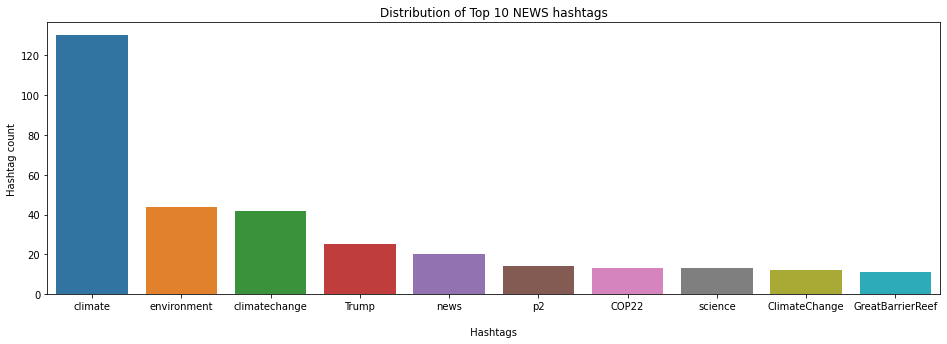

In [214]:
# making frequency distribution top 10 News hashtags
k = nltk.FreqDist(News)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 NEWS hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

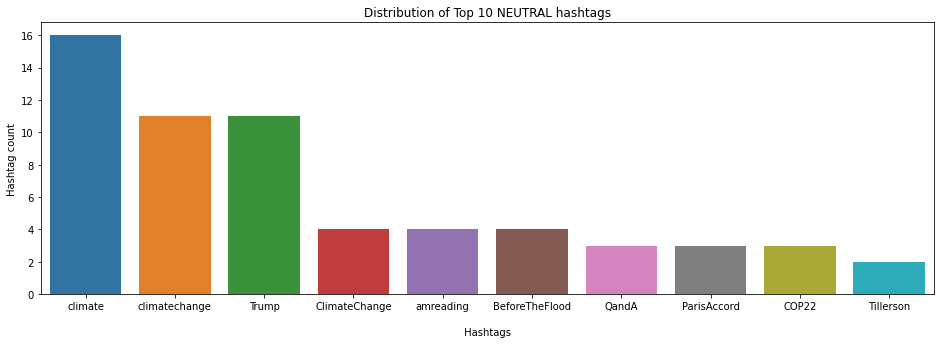

In [215]:
# making frequency distribution top 10 Neutral hashtags
k = nltk.FreqDist(Neutral)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 NEUTRAL hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

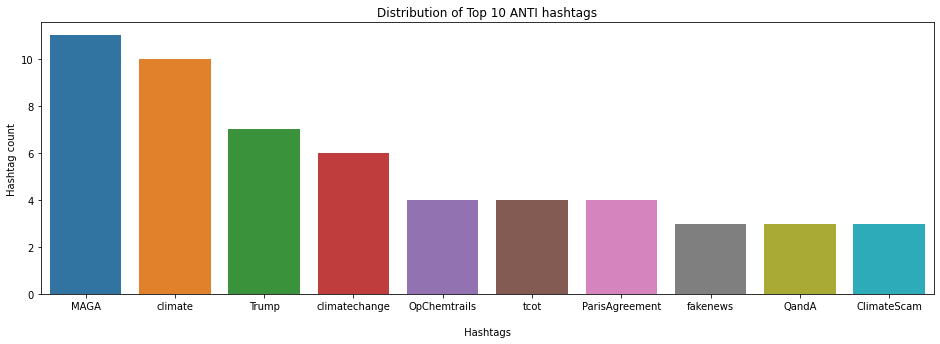

In [216]:
# making frequency distribution top 10 Anti hashtags
k = nltk.FreqDist(Anti)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 ANTI hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

In [21]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


## Emoji Analysis
### Extracting emojis from Tweets  

In [217]:
#extracting emojis
import emoji
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [218]:
#applying the extracting of emojis and creating an emoji column
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']!='']['emoji']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emoji, Length: 179, dtype: object

In [219]:
#convert emojis on the dataframe to text 
def text_emoji(txt):
  emoji_converter = emoji.demojize(txt, delimiters=("", ""))
  return emoji_converter

In [220]:
#applying the converting def
df['message'] = df['message'].apply(text_emoji)
df.loc[56:60]

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
56,Anti,@MissLizzyNJ lmao face_with_tears_of_joy snowf...,911385,5.928571,14,96,[],😂❄❄🤦♂
57,Anti,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263,5.714286,21,140,[],
58,Neutral,@GlennF They are calling to the great Space Cy...,113396,4.800000,15,86,[],
59,Pro,RT @GreenpeaceEAsia: Pollution from India and ...,526281,6.000000,17,119,[],
60,Pro,RT @UNEP: The @citiesclimfin lays out how citi...,774850,6.000000,17,118,[],


we can see there are no emoji on the messages 

In [221]:
# Check duplicate messages in the training data
dupl_train = df['message']
dupl_train = df[dupl_train.isin(dupl_train[dupl_train.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the training data and to see that each message is unique
dupl_tweet_id = df['tweetid']
df[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# Check for duplicate messages in the testing data
dupl_test = test['message']
dupl_test = test[dupl_test.isin(dupl_test[dupl_test.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the testing data and to see that each message is unique
dupl_tweet_id = test['tweetid']
test[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# View percentage of duplicates 
dupl_train_prop = (len(dupl_train)/len(df['message']))*100
dupl_test_prop = (len(dupl_test)/len(test['message']))*100
print('Train data percentange of Retweets:',str(round((dupl_train_prop),3))+"%")
print('Test data percentage of Retweets:',str(round((dupl_test_prop),3))+"%")

Train data percentange of Retweets: 12.061%
Test data percentage of Retweets: 11.037%


In [222]:
dupl_test.head(7)

,message,tweetid
5094,How can people be so ignorant when it comes to...,618984
9691,How can people be so ignorant when it comes to...,353129
960,Obamas fiddled global warming data: *Shameless...,818493
4866,Obamas fiddled global warming data: *Shameless...,122281
3341,RT @1followernodad: ok a climate change denier...,543287
4978,RT @1followernodad: ok a climate change denier...,176463
9601,RT @1followernodad: ok a climate change denier...,345248


In [188]:
df.shape # checking the new shape of the df 

(15819, 8)

In [223]:
#removinging @handles
#function for removing @user
def remove_user(input_txt):
    user_pattern = '@[\w]*'
    r = re.findall(user_pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt

In [224]:
# remove twitter handles (@user) from train data
df['message'] =df['message'].apply(remove_user)
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,6.421053,19,140,[],
1,Pro,It's not like we lack evidence of anthropogeni...,126103,5.300000,10,62,[],
2,News,RT : Researchers say we have three years to a...,698562,6.421053,19,140,[],
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,"RT : It's 2016, and a racist, sexist, climate...",466954,5.833333,18,122,[#ElectionNight],
5,Pro,Worth a read whether you do or don't believe i...,425577,6.928571,14,110,[],
6,Pro,RT : Mike Pence doesn’t believe in global war...,294933,6.500000,16,119,[],
7,Pro,RT : Six big things we can ALL do today to fi...,992717,5.652174,23,152,[],
8,Pro,My 8yo nephew is inconsolable. He wants to d...,664510,4.600000,25,139,[],
9,Pro,RT : no offense… but like… how do you just no...,260471,4.933333,15,88,[],


### Tweet Cleaning
This is to remove noise from the data such as punctuatioon ,characters and other things to make the data more clean.

In [225]:
import re
import string
from nltk.stem import PorterStemmer
import unidecode

def process_tweet(tweet):
    """
    Process tweet function.
    Input:
        tweet: a string containing a tweet
    Returns:
        tweets_clean: a list of words containing the processed tweet
        """
    # Removing Hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Removing Retweets
    tweet = re.sub('#(RT|rt)*', '', tweet)
    # Remove Numbers and words with Num
    tweet = re.sub('\w*\d\w*', '', tweet)
    # removing @mentions
    tweet= re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'@[A-Za-zA-Z0-9]+', '', tweet)
    tweet = re.sub(r'@[A-Za-z]+', '', tweet)
    tweet = re.sub(r'@[-)]+', '', tweet)
    # removing #sign from tweet
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    # remove the '&gt;'
    tweet = re.sub(r'&[a-z;]+', '', tweet)
    # Remove extra space
    twet = re.sub(r'\s\s+', ' ', tweet)
    # Remove space some space in the beggining of the tweet
    tweet = tweet.lstrip(' ')
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
 
    
    return tweet.lower()
    

In [226]:
# cleaning the text of train data
df['message'] = df['message'].apply(lambda x: process_tweet(x))

# show the cleaned text 
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,6.421053,19,140,[],
1,Pro,it s not like we lack evidence of anthropogeni...,126103,5.300000,10,62,[],
2,News,rt researchers say we have three years to ac...,698562,6.421053,19,140,[],
3,Pro,todayinmaker wired was a pivotal year in the ...,573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,rt it s and a racist sexist climate change ...,466954,5.833333,18,122,[#ElectionNight],
5,Pro,worth a read whether you do or don t believe i...,425577,6.928571,14,110,[],
6,Pro,rt mike pence doesn’t believe in global warm...,294933,6.500000,16,119,[],
7,Pro,rt six big things we can all do today to fig...,992717,5.652174,23,152,[],
8,Pro,my nephew is inconsolable he wants to die of ...,664510,4.600000,25,139,[],
9,Pro,rt no offense… but like… how do you just not...,260471,4.933333,15,88,[],


Removing stop words

In [227]:
stop_list=list(stopwords.words('english'))

# Removing StopWord
def Change_text(tweet):
  main_text=[word for word in tweet.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [228]:
# Stop words Removal from train data
df['message'] = df['message'].apply(Change_text)
df.head(2)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,polyscimajor epa chief think carbon dioxide ma...,625221,6.421053,19,140,[],
1,Pro,like lack evidence anthropogenic global warming,126103,5.300000,10,62,[],


# Removing Short Words

In [229]:
# remove short words
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head(2)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,polyscimajor epa chief think carbon dioxide ma...,625221,6.421053,19,140,[],
1,Pro,like lack evidence anthropogenic global warming,126103,5.300000,10,62,[],



### 1. Tokenization

It consists in dividing the texts into words or smaller sub-texts, allowing us to determine the “vocabulary” of the dataset (set of unique tokens present in the data). Usually we use word-level representation. For our exemple we will use NLTK Tokenizer()



In [230]:
# Tokenizinging tweet train data
#df['message'] = df['message'].apply(lambda x: x.split())
tokenizer2 = TweetTokenizer(reduce_len=True)
df['message'] = df['message'].apply(tokenizer2.tokenize)
df.head(2)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,"[polyscimajor, epa, chief, think, carbon, diox...",625221,6.421053,19,140,[],
1,Pro,"[like, lack, evidence, anthropogenic, global, ...",126103,5.300000,10,62,[],


## 2 Stem or lemmatize

uncomment one of the optio  below to use 

OPTION 1 stemming
- Stemming the words can reduce its meaning or number of charaters in the word 
- Stemming is a much faster process 
for example `change/changed/changer` to `chang` the last letter is removed


In [38]:
#from nltk.stem.porter import *
#stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
#df['message'] = df['message'].apply(lambda x: [stemmer.stem(i) for i in x])

OPTION 2 Lemmatizing 
- Lemmatizing entails reducing a word to its canonical or dictionary form.
for example `change/changed/changer`  to `change` is doest cut the word.
- it is highly accurate than stemming 


In [231]:
#uncomment if you wanna use this option
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def lemm_stem(tokens: str) -> str:
    return [lemm.lemmatize(token) for token in tokens]

df['message'] = df['message'].apply(lemm_stem)

In [232]:
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,"[polyscimajor, epa, chief, think, carbon, diox...",625221,6.421053,19,140,[],
1,Pro,"[like, lack, evidence, anthropogenic, global, ...",126103,5.300000,10,62,[],
2,News,"[researcher, say, three, year, act, climate, c...",698562,6.421053,19,140,[],
3,Pro,"[todayinmaker, wired, pivotal, year, war, clim...",573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,"[racist, sexist, climate, change, denying, big...",466954,5.833333,18,122,[#ElectionNight],
5,Pro,"[worth, read, whether, believe, climate, change]",425577,6.928571,14,110,[],
6,Pro,"[mike, penny, doesn, ’, t, believe, global, wa...",294933,6.500000,16,119,[],
7,Pro,"[six, big, thing, today, fight, climate, chang...",992717,5.652174,23,152,[],
8,Pro,"[nephew, inconsolable, want, die, old, age, li...",664510,4.600000,25,139,[],
9,Pro,"[offense, …, like, …, believe, …, global, warm...",260471,4.933333,15,88,[],


Changing back the sentiment to numbers

In [233]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 'Pro' :
          sentiment_class.append(1)
      elif i == 'Neutral' :
          sentiment_class.append(0)
      elif i == 'Anti' :
          sentiment_class.append(-1)
      else :
          sentiment_class.append(2)

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df.copy())
df.head()

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221,6.421053,19,140,[],
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103,5.300000,10,62,[],
2,2,"[researcher, say, three, year, act, climate, c...",698562,6.421053,19,140,[],
3,1,"[todayinmaker, wired, pivotal, year, war, clim...",573736,5.666667,15,99,[#TodayinMaker#],
4,1,"[racist, sexist, climate, change, denying, big...",466954,5.833333,18,122,[#ElectionNight],


Changing the cleaned message back to a sentence

In [234]:
tokenized_message =df['message']

code takes MORE than 7 minutes to run

In [235]:
# join tokens into one sentence
for i in range(len(tokenized_message)):
    tokenized_message[i] = ' '.join(tokenized_message[i])

C:\Users\f5468981\AppData\Local\Temp/ipykernel_3944/1326650877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokenized_message[i] = ' '.join(tokenized_message[i])


In [238]:
df['message']=tokenized_message #replacing message with tokenised words

In [239]:
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,1,polyscimajor epa chief think carbon dioxide ma...,625221,6.421053,19,140,[],
1,1,like lack evidence anthropogenic global warming,126103,5.300000,10,62,[],
2,2,researcher say three year act climate change i...,698562,6.421053,19,140,[],
3,1,todayinmaker wired pivotal year war climate ch...,573736,5.666667,15,99,[#TodayinMaker#],
4,1,racist sexist climate change denying bigot lea...,466954,5.833333,18,122,[#ElectionNight],
5,1,worth read whether believe climate change,425577,6.928571,14,110,[],
6,1,mike penny doesn ’ t believe global warming sm...,294933,6.500000,16,119,[],
7,1,six big thing today fight climate change clima...,992717,5.652174,23,152,[],
8,1,nephew inconsolable want die old age like peri...,664510,4.600000,25,139,[],
9,1,offense … like … believe … global warming … … …,260471,4.933333,15,88,[],


# Visualisation of data

## Analysing the most common words used in the tweets

The common words used in the tweets: WordCloud

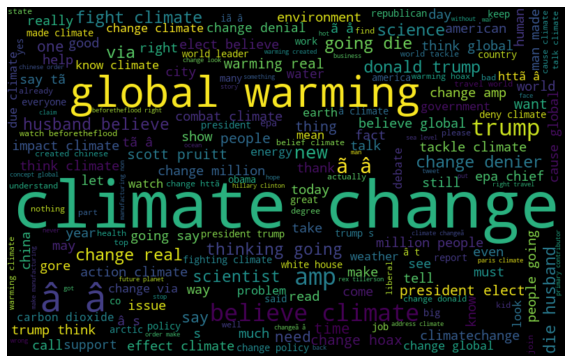

In [240]:
# create text from all tweets
all_words = ' '.join([str(text) for text in df['message']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment 1

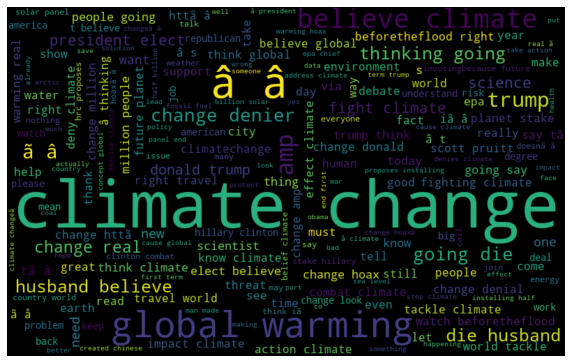

In [241]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment 0

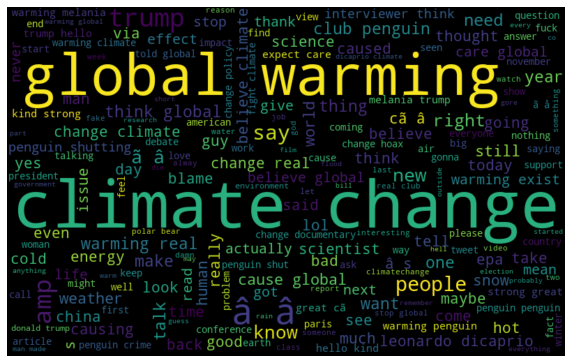

In [242]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment -1

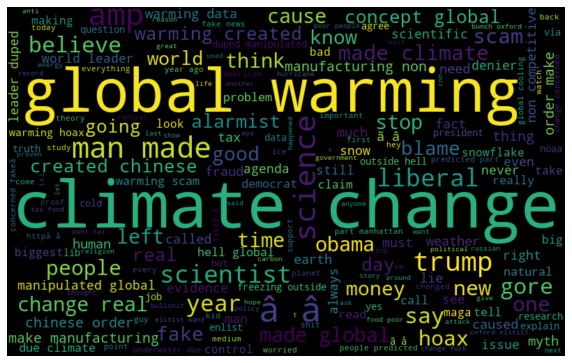

In [243]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment 2

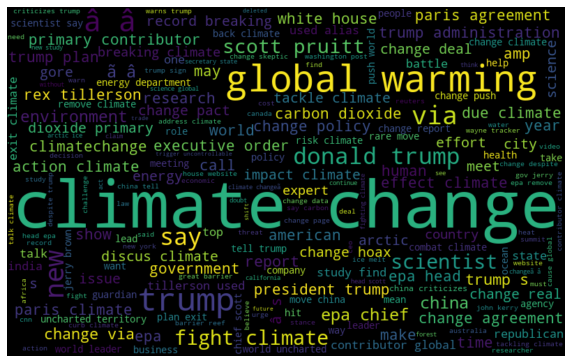

In [244]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [245]:
df.columns

Index(['sentiment', 'message', 'tweetid', 'avg_word_length', 'word_count',
       'character_count', 'hashtags', 'emoji'],
      dtype='object')

### Analyising the Hashtags

Common Hashtags used for Sentiment 1

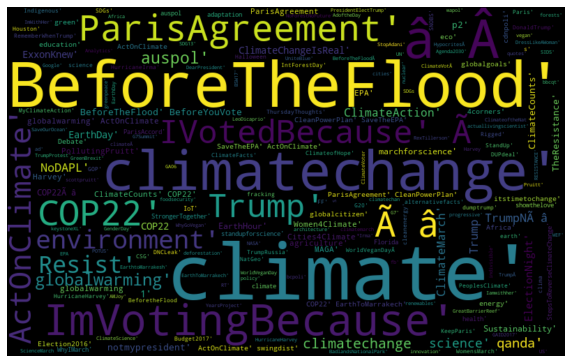

In [246]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common Hashtags used for Sentiment 0

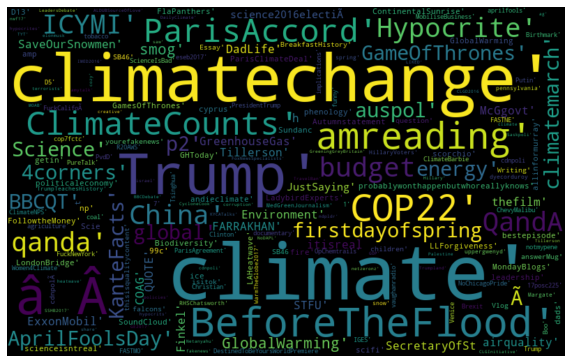

In [247]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common Hashtags used for Sentiment -1

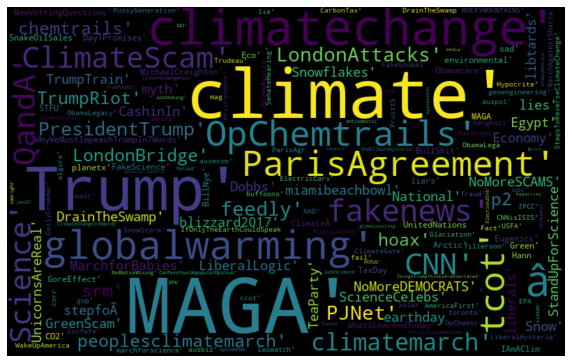

In [248]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common Hashtags used for Sentiment 2

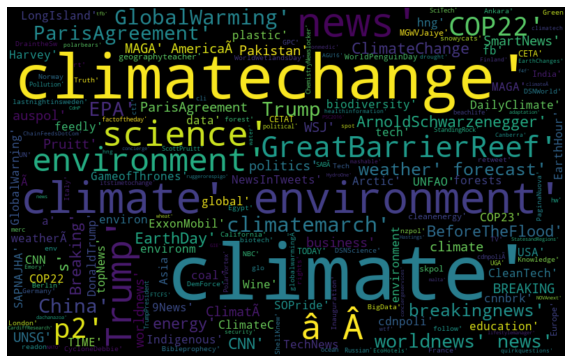

In [249]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Analysing Emojis

In [250]:
df['emo'] = df['emoji'].apply(text_emoji)#changing emojis to text


Analysing emojis mostly used in sentement -1

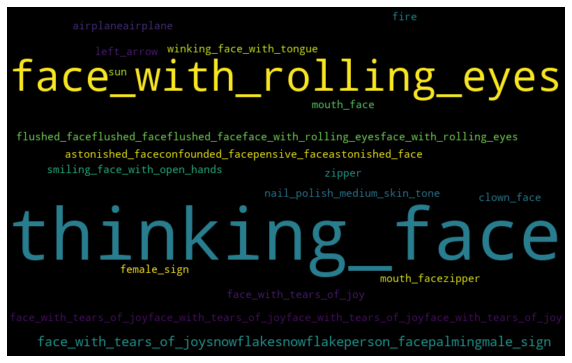

In [251]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['emo'][df['sentiment'] == -1]])
#creating the word cloud containning only text emojis
wordcloud = WordCloud(width=800, height=500,background_color="black",
            random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Analysing the emojis for all the tweet message  to form a wordcloud 

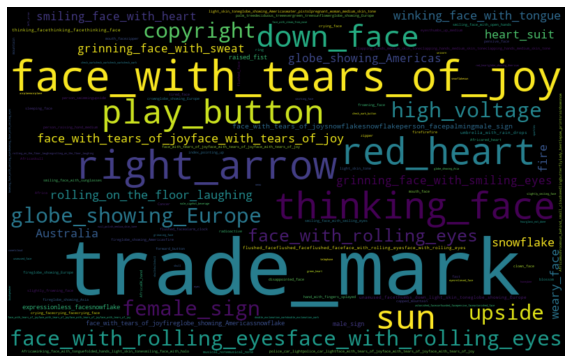

In [252]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['emo']])
#creating the word cloud containning only text emojis
wordcloud = WordCloud(width=800, height=500,background_color="black", 
            random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sentiment        15819 non-null  int64  
 1   message          15819 non-null  object 
 2   tweetid          15819 non-null  int64  
 3   avg_word_length  15819 non-null  float64
 4   word_count       15819 non-null  int64  
 5   character_count  15819 non-null  int64  
 6   hashtags         15819 non-null  object 
 7   emoji            15819 non-null  object 
 8   emo              15819 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


### Preprocessing the test data


In [253]:
df_test=test.copy()

In [254]:
# Extract the hashtags from the tweets from the test data

def extract_hashtags(df_test):

  df_test['hashtags'] = df_test['message'].str.findall(r'#.*?(?=\s|$)')
  df_test['hashtags'] = df_test['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df_test

extract_hashtags(df_test)

,message,tweetid,hashtags
0,Europe will now be looking to China to make su...,169760,NaN
1,Combine this with the polling of staffers re c...,35326,NaN
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,"[#climatechange, #science, #poetry, #fakenews,..."
10542,2016: the year climate change came home: Durin...,875167,NaN
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,[#aldublaboroflove]


### Extracting emojis and converting emojis to text

In [255]:
import emoji
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [256]:
df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']!='']['emoji']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emoji, Length: 120, dtype: object

In [257]:
df_test['message'] = df_test['message'].apply(text_emoji)
df_test.loc[98:100]

,message,tweetid,hashtags,emoji
98,I just want to save the planet pensive_face cl...,693559,NaN,😔
99,RT @pablorodas: ClimateCentral: Cities from Sy...,66255,NaN,
100,Soooo was there a search criterion here other ...,218797,NaN,


In [258]:
# remove twitter handles (@user) from test data
df_test['message'] =df_test['message'].apply(remove_user)

In [259]:
# cleaning the text of train data
df_test['message'] = df_test['message'].apply(lambda x: process_tweet(x))

# show the cleaned text 
df_test.head(10)

,message,tweetid,hashtags,emoji
0,europe will now be looking to china to make su...,169760,NaN,
1,combine this with the polling of staffers re c...,35326,NaN,
2,the scary unimpeachable evidence that climate ...,224985,"[#itstimetochange, #climatechange]",
3,\nputin got to you too jill \ntrump doesn t b...,476263,NaN,
4,rt female orgasms cause global warming \n-s...,872928,NaN,
5,rt trump muzzles employees of several gov’t ...,75639,[#climate],
6,yes wrote that in yr comp sci ethics part was...,211536,NaN,
7,rt indonesian farmers weather climate change...,569434,[#climate],
8,rt british scientists face a ‘huge hit’ if t...,315368,NaN,
9,aid for agriculture | sustainable agriculture ...,591733,NaN,


In [260]:
# Stop words Removal from train data
df_test['message'] = df_test['message'].apply(Change_text)

### Removing Short Words

In [261]:
#remove short words
df_test['message'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))


1. Tokenization

In [262]:
# Tokenizinging tweet test data
#df_test['message'] = df_test['message'].apply(lambda x: x.split())
df_test['message'] = df_test['message'].apply(tokenizer2.tokenize)

choose one between stemming and lemmatising

stemming

In [110]:
# apply stemmer for tokenized_tweet
#porter stemmer
#df_test['message'] = df_test['message'].apply(lambda x: [stemmer.stem(i) for i in x])

Lemmetizing
if wanna use it uncomment below 

In [263]:
#uncomment if you wanna use this option
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def lemm_stem(tokens: str) -> str:
    return [lemm.lemmatize(token) for token in tokens]

df_test['message'] = df_test['message'].apply(lemm_stem)

Changing tokenised into the senteces  

In [264]:
tokenized_message =df_test['message']
# join tokens into one sentence
for i in range(len(tokenized_message)):
    tokenized_message[i] = ' '.join(tokenized_message[i])

C:\Users\f5468981\AppData\Local\Temp/ipykernel_3944/2296573070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokenized_message[i] = ' '.join(tokenized_message[i])


In [265]:
df_test['message']=tokenized_message# replaced messages with tokenised message

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

In [266]:
# Seperate features and tagret variables
y = df['sentiment']
X = df['message']

### Methods of vectorising 
uncomment one below

# **Option 1** 
Changing text into something readable by machine learning model
- TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction ,It uses matrix 

In [267]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

# **Option 2** 
Changing text into something readable by machine learning model.
- CounterVectorizer This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction ,Convert a collection of text documents to a matrix of token counts

In [173]:
#cv = CountVectorizer(ngram_range=(1, 4),analyzer = 'word',stop_words='english')
#X_vectorized = cv.fit_transform(X)

Choose option 1 or 2 

### We split the data after choosing one of the options above

In [268]:
# Split the train data to create validation dataset
X_train,X_test,y_train,y_test = train_test_split(X_vectorized,y,test_size=0.01,shuffle=True, stratify=y, random_state=42)

In [269]:
X_train.shape #checling the shapes of the x_train

(15660, 75927)

# Building classification models!

In [138]:
from sklearn import metrics

## 5.1 Logistic Regression  model

In [270]:
#creating experiment on comet
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
#calling the model and fitting 
modelstart = time.time()
logreg = LogisticRegression(C= 5, 
        max_iter= 10,
        multi_class='ovr',
        random_state= 220,
        solver= 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall    = recall_score(y_test, y_pred,average='weighted')
f1        = f1_score(y_test, y_pred,average ='weighted')
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 220,
    "model_type": "LogisticRegression",
    "vectorizer": "TfidfVectorizer",# replace with TfidfVectorizer if used option 1
    'C': 5,
    'max_iter': 10,
    'multi_class': 'ovr',
    'solver':  'sag',
    "stratify" : 'True'
 }
metrics = {
     "precision": precision,
     "recall": recall,
     "f1": f1,
     "accuracy": accuracy
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/54bc4a9f5c2240f1bd1d243dddb98ff3
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.01 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET IN

              precision    recall  f1-score   support

          -1       0.67      0.31      0.42        13
           0       0.69      0.38      0.49        24
           1       0.71      0.92      0.80        86
           2       0.79      0.64      0.71        36

    accuracy                           0.72       159
   macro avg       0.72      0.56      0.60       159
weighted avg       0.72      0.72      0.70       159



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/3e8267c3a1b54f57b73eb83231c572f7
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.7232704402515723
COMET INFO:     f1        : 0.7018924669966362
COMET INFO:     precision : 0.7235281926238334
COMET INFO:     recall    : 0.7232704402515723
COMET INFO:   Parameters:
COMET INFO:     C            : 5
COMET INFO:     max_iter     : 10
COMET INFO:     model_type   : LogisticRegression
COMET INFO:     multi_class  : ovr
COMET INFO:     random_state : 220
COMET INFO:     solver       : sag
COMET INFO:     stratify     : True
COMET INFO:     vectorizer   : TfidfVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environm

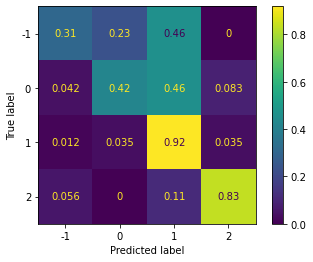

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,normalize="true")
plt.show()

hypertuning the Logistic regression classifier

In [271]:
#parameters to use
param_grid = {'C': [10,5,100,1000,50],
              'max_iter': [5,10,50,100],
              'multi_class': ['ovr', 'multinomial'],
              'random_state': [220,111,500,10],
              'solver': [ 'sag', 'saga'],
            }
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1,verbose =5)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_test)
print("Best parameters:")
lr_params = grid_LR.best_params_
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


## 5.2 GradientBoostingClassifier

In [91]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
modelstart = time.time()
gbbc = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0, max_depth=1)
gbbc.fit(X_train, y_train)
y_pred = gbbc.predict(X_test)

accuracy1  = accuracy_score(y_pred,y_test)
precision1 = precision_score(y_test, y_pred,average='weighted')
recall1    = recall_score(y_test, y_pred,average='weighted')
f11        = f1_score(y_test, y_pred,average ='weighted')
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "gradient boosting",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'loss': 'deviance',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 1
 }
metrics = {
     "precision": precision1,
     "recall": recall1,
     "f1": f11,
     "accuracy": accuracy1
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/12a1c048ff9643b994df24f939452e9c

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/12a1c048ff9643b994df24f939452e9c
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.6352201257861635
COMET INFO:     f1        : 0.6120431728780075
COMET INFO:  

              precision    recall  f1-score   support

          -1       1.00      0.38      0.56        13
           0       0.38      0.21      0.27        24
           1       0.64      0.84      0.72        86
           2       0.68      0.53      0.59        36

    accuracy                           0.64       159
   macro avg       0.68      0.49      0.54       159
weighted avg       0.64      0.64      0.61       159



COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: All files uploaded, waiting for confirmation they have been all received


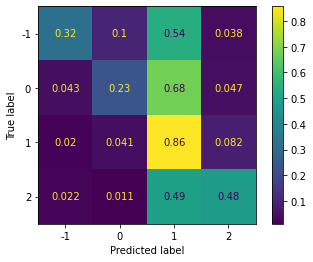

In [101]:
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

### Hypertuning the GradientBoosting classier

In [90]:
GradientBoostingClassifier().get_params()
param_grid = {'learning_rate': [0.5,0.1],
              'n_estimators': [10,100],
              'random_state': [42.220,111],
              'max_depth': [1,10]
            }
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1,verbose =5)
grid_gbc.fit(X_train, y_train)
y_pred = grid_gbc.predict(X_test)
print("Best parameters:")
gbc_params = grid_gbc.best_params_
print(grid_gbc.best_params_)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.50399158        nan 0.61055348        nan 0.62726236
        nan 0.66053521        nan 0.38032224        nan 0.52200488
        nan 0.55813633        nan 0.65211029]
  warnings.warn(


Best parameters:
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100, 'random_state': 111}
              precision    recall  f1-score   support

          -1       0.40      0.31      0.35        13
           0       0.50      0.29      0.37        24
           1       0.67      0.81      0.74        86
           2       0.74      0.64      0.69        36

    accuracy                           0.65       159
   macro avg       0.58      0.51      0.53       159
weighted avg       0.64      0.65      0.64       159



## 5.3 RandomForestClassifier

In [92]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
# Create an experiment with your api key
modelstart = time.time()
rf = RandomForestClassifier(max_features=4, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy  = accuracy_score(y_pred,y_test)
precision = precision_score(y_test, y_pred,average='weighted')
recall1   = recall_score(y_test, y_pred,average='weighted')
f1       = f1_score(y_test, y_pred,average ='weighted')
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Random Forest Classifier ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'max_features': 4,
     }
metrics = {
     "precision": precision,
     "recall": recall,
     "f1": f1,
     "accuracy": accuracy
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/749c50075336458eaf1cdddbf07dbd59

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/749c50075336458eaf1cdddbf07dbd59
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.6792452830188679
COMET INFO:     f1        : 0.6392080990026519
COMET INFO:  

              precision    recall  f1-score   support

          -1       0.67      0.31      0.42        13
           0       0.67      0.17      0.27        24
           1       0.66      0.93      0.77        86
           2       0.80      0.56      0.66        36

    accuracy                           0.68       159
   macro avg       0.70      0.49      0.53       159
weighted avg       0.69      0.68      0.64       159



COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: Still uploading 2 file(s), remaining 96.59 KB/340.43 KB


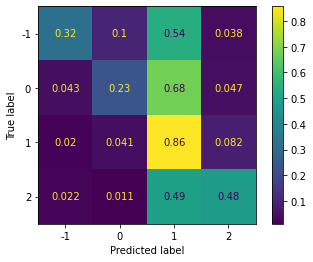

In [111]:
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

In [93]:
RandomForestClassifier().get_params()
param_grid = { 'bootstrap':[True],
              'n_estimators': [10,20,50,100,150],
              'random_state': [42],
              'criterion':['gini', 'entropy', 'log_loss']
              }
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1,verbose =5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best parameters:")
gbc_params = grid_rf.best_params_
print(grid_rf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.65135972 0.65859306 0.6654477  0.66745593 0.66930405 0.65483394
 0.66209922 0.66645347 0.66865561 0.66891154        nan        nan
        nan        nan        nan]
  warnings.warn(


Best parameters:
{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 150, 'random_state': 42}
accuracy 0.710691823899371
              precision    recall  f1-score   support

          -1       0.67      0.31      0.42        13
           0       0.80      0.17      0.28        24
           1       0.67      0.95      0.79        86
           2       0.88      0.64      0.74        36

    accuracy                           0.71       159
   macro avg       0.76      0.52      0.56       159
weighted avg       0.74      0.71      0.67       159



## 5.4 Support vector machine

In [94]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
# Create an experiment with your api key
from sklearn.svm import SVC
modelstart = time.time() 
svc = SVC(kernel='linear',C = 0.25,gamma= 'scale',decision_function_shape='ovr')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("accuracy of the model is {}".format(svc.score(X_test, y_test)))
print('f1 score of  Support vector machine{}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precision score of  Support vector machine is {}'.format(precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Linear Support vector machine  ",
    "vectorizer": "TfidfVectorizer",# replace CountVectorizer with  if used option 1
    'C':0.25,
    'gamma': 'scale',
    'decision_function_shape':'ovr' }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/70361fc219d64b2a90f75cf88c59dfb9

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/70361fc219d64b2a90f75cf88c59dfb9
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.5991089835429457
COMET INFO:     precision : 0.7311320754716981
COMET INFO:  

accuracy of the model is 0.660377358490566
f1 score of  Support vector machine0.5991089835429457
precision score of  Support vector machine is 0.7311320754716981
              precision    recall  f1-score   support

          -1       1.00      0.23      0.38        13
           0       0.75      0.12      0.21        24
           1       0.62      0.99      0.77        86
           2       0.88      0.39      0.54        36

    accuracy                           0.66       159
   macro avg       0.81      0.43      0.47       159
weighted avg       0.73      0.66      0.60       159



COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: All files uploaded, waiting for confirmation they have been all received


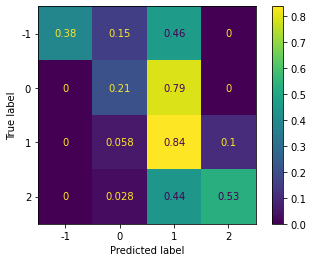

In [95]:
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

### hypertuning  Support vector machine

In [96]:
#hypertuning
parameters = {'kernel':['linear', 'rbf'],
              'C':[1,50,20],
              'gamma': ['auto','scale'],
              'decision_function_shape':['ovo','ovr']}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)
print("Best parameters:")
gbc_params = clf.best_params_
print(clf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:
{'C': 20, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
accuracy 0.660377358490566
              precision    recall  f1-score   support

          -1       1.00      0.23      0.38        13
           0       0.75      0.12      0.21        24
           1       0.62      0.99      0.77        86
           2       0.88      0.39      0.54        36

    accuracy                           0.66       159
   macro avg       0.81      0.43      0.47       159
weighted avg       0.73      0.66      0.60       159



## 5.5  Naive Bayes MultinomialNB()

In [97]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
modelstart = time.time()
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

accuracy  = accuracy_score(y_pred,y_test)
precision = precision_score(y_test, y_pred,average='weighted')
recall1   = recall_score(y_test, y_pred,average='weighted')
f1       = f1_score(y_test, y_pred,average ='weighted')
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "naive Bayes multinomialNB   ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
}
metrics = {
     "precision": precision,
     "recall": recall,
     "f1": f1,
     'accuracy':accuracy
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/ca558ae28c7940edbb1e53a872e3a30f

c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defin

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.00      0.00      0.00        24
           1       0.61      0.99      0.75        86
           2       0.78      0.39      0.52        36

    accuracy                           0.62       159
   macro avg       0.35      0.34      0.32       159
weighted avg       0.50      0.62      0.52       159



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/ca558ae28c7940edbb1e53a872e3a30f
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.6226415094339622
COMET INFO:     f1        : 0.5242574349269956
COMET INFO:     precision : 0.504492362982929
COMET INFO:     recall    : 0.7044025157232704
COMET INFO:   Parameters:
COMET INFO:     model_type   : naive Bayes multinomialNB   
COMET INFO:     random_state : 42
COMET INFO:     vectorizer   : CountVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (543.61 K

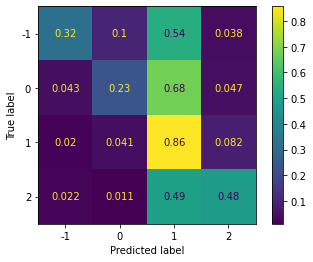

In [125]:
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

### 5.6 KNeighborsClassifier

In [100]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
n_neighbors = 1 # <--- change this number to play around with how many nearest neighbours to look for.
from sklearn.metrics import  log_loss
knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)
# Get predictions on the test set 
y_pred = knn.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(knn.score(X_test, y_test)))
print('f1 score of KNeighborsClassifier {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precision score of KNeighborsClassifieris {}'.format(precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "KNeighborsClassifier ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'n_neighbours':1}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/d1f31982dced4b8d85906cd3a63d25ec
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (543.61 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET 

accuracy of the model is 0.0440251572327044
f1 score of KNeighborsClassifier 0.06727715495751012
precision score of KNeighborsClassifieris 0.37222222222222223
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.22      0.08      0.12        24
           1       0.60      0.03      0.07        86
           2       0.06      0.06      0.06        36
           3       0.00      0.00      0.00         0

    accuracy                           0.04       159
   macro avg       0.18      0.03      0.05       159
weighted avg       0.37      0.04      0.07       159



c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_clas

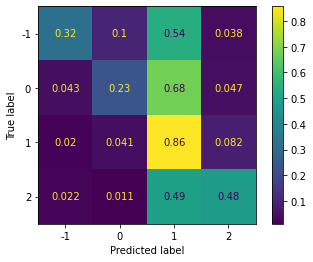

In [132]:
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

In [ ]:
#hypertuning
parameters = {'n_neighbors':[1,2], 
            'weights':['uniform','distance'],
            'algorithm':['auto','brute'],
            }
knn1 = KNeighborsClassifier()
clf = GridSearchCV(knn1, parameters)
clf.fit(X_train,y_train)
print("Best parameters:")
gbc_params = clf.best_params_
print(clf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
accuracy 0.5851243152128108
              precision    recall  f1-score   support

          -1       0.36      0.45      0.40       389
           0       0.37      0.50      0.42       706
           1       0.82      0.54      0.65      2559
           2       0.54      0.80      0.64      1092

    accuracy                           0.59      4746
   macro avg       0.52      0.57      0.53      4746
weighted avg       0.65      0.59      0.59      4746



## 5.7 Stochastic Gradient descent  Classifier

In [ ]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
modelstart = time.time() 
sgb = SGDClassifier(loss='modified_huber',penalty='l2',max_iter=50, tol=0.0001)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(sgb.score(X_test, y_test)))
print('f1 score of Stochastic Gradient descent  Classifier {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precision score of Stochastic Gradient descent  Classifier is {}'.format(precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Stochastic Gradient descent  Classifier",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'loss':'modified_huber',
    'penalty':'l2',
    'max_iter':50,
    'tol':0.0001
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/ea62f5704dd64af2a7e1b0c14ac45081



accuracy of the model is 0.7484276729559748
f1 score of Stochastic Gradient descent  Classifier 0.7310769319542956
precision score of Stochastic Gradient descent  Classifier is 0.7480017303916675
              precision    recall  f1-score   support

          -1       0.71      0.38      0.50        13
           0       0.71      0.42      0.53        24
           1       0.74      0.93      0.82        86
           2       0.80      0.67      0.73        36

    accuracy                           0.75       159
   macro avg       0.74      0.60      0.64       159
weighted avg       0.75      0.75      0.73       159



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/ea62f5704dd64af2a7e1b0c14ac45081
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7310769319542956
COMET INFO:     precision : 0.7480017303916675
COMET INFO:     recall    : 0.7484276729559748
COMET INFO:   Parameters:
COMET INFO:     loss         : modified_huber
COMET INFO:     max_iter     : 50
COMET INFO:     model_type   : Stochastic Gradient descent  Classifier
COMET INFO:     penalty      : l2
COMET INFO:     random_state : 42
COMET INFO:     tol          : 0.0001
COMET INFO:     vectorizer   : CountVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename   

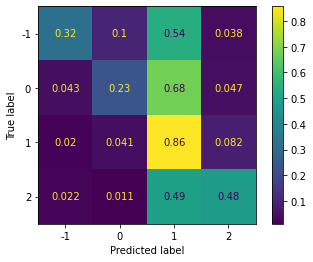

In [134]:
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

## 5.8 Catboost Classifier

In [ ]:
%pip install catboost
%pip install ipywidgets
%jupyter nbextension enable --py widgetsnbextension


Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%jupyter` not found.


In [136]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
modelstart = time.time()
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train) 
y_pred = cbc.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(cbc.score(X_test, y_test)))
print('f1 score of CatBoostClassifier {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precision score of CatBoostClassifier is {}'.format(precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Catboost Classifier",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/5cbd3bf70c2f4965a149300028cb51b2



Learning rate set to 0.091045
0:	learn: 1.3326492	total: 1.29s	remaining: 21m 27s
1:	learn: 1.2872782	total: 2.26s	remaining: 18m 48s
2:	learn: 1.2517355	total: 3.47s	remaining: 19m 14s
3:	learn: 1.2208131	total: 4.47s	remaining: 18m 33s
4:	learn: 1.1965418	total: 5.41s	remaining: 17m 56s
5:	learn: 1.1757230	total: 6.53s	remaining: 18m 2s
6:	learn: 1.1589497	total: 7.54s	remaining: 17m 49s
7:	learn: 1.1454184	total: 8.47s	remaining: 17m 30s
8:	learn: 1.1324466	total: 9.52s	remaining: 17m 28s
9:	learn: 1.1219245	total: 10.6s	remaining: 17m 25s
10:	learn: 1.1142903	total: 11.5s	remaining: 17m 11s
11:	learn: 1.1049061	total: 12.3s	remaining: 16m 56s
12:	learn: 1.0968551	total: 13.3s	remaining: 16m 51s
13:	learn: 1.0888925	total: 14.3s	remaining: 16m 49s
14:	learn: 1.0811215	total: 15.4s	remaining: 16m 49s
15:	learn: 1.0738104	total: 16.5s	remaining: 16m 55s
16:	learn: 1.0689424	total: 17.8s	remaining: 17m 10s
17:	learn: 1.0639795	total: 19s	remaining: 17m 15s
18:	learn: 1.0600004	total: 2

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/5cbd3bf70c2f4965a149300028cb51b2
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.6133856533929899
COMET INFO:     precision : 0.6491348278845422
COMET INFO:     recall    : 0.6540880503144654
COMET INFO:   Parameters:
COMET INFO:     model_type   : Catboost Classifier
COMET INFO:     random_state : 42
COMET INFO:     vectorizer   : CountVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (306.76 KB)
COMET INFO:     installed packages       : 1
COMET I

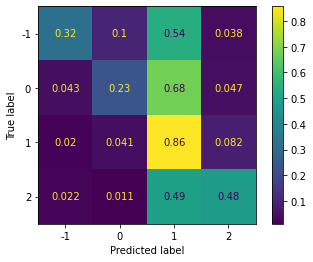

In [138]:
#confusion matrix
plot_confusion_matrix(gbbc, X_test, y_test,normalize="true")
plt.show()

### COMET  experiment to end 

In [142]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/06b06e37b6c249d9a562a74542501da4
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy      : 0.6662452591656132
COMET INFO:     f1 [7]        : (0.45293883415144864, 0.6934500801408457)
COMET INFO:     precision [7] : (0.6505118596366317, 0.7175479331666293)
COMET INFO:     recall [7]    : (0.45512010113780027, 0.7035398230088495)
COMET INFO:   Parameters:
COMET INFO:     loss         : modified_huber
COMET INFO:     max_iter     : 50
COMET INFO:     model_type   : Catboost Classifier
COMET INFO:     n_neighbours : 1
COMET INFO:     penalty      : l2
COMET INFO:     random_state : 42
COMET INFO:     tol          : 0.0001
COMET INFO:     vectorizer   : CountVectorizer
COMET INFO:   Uploads:

#  Generation a submission file to kaggle 

In [145]:
test1 = test['message']
# vectorise test data
test_vec = vectorizer.transform(test1)
# Predict the sentiment using the test data
y_pred = logreg.predict(test_vec)
# Assign a new column of predictions
test['sentiment'] = y_pred
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('submission.csv', index=False)


# Creating Pickle files 

### Creating model pickle files for streamlit app 

In [ ]:
#first model to use for streamlit 
import pickle

model_save_path = "logistic_regression_model.pkl"# name for the logistic regresion classifier  
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

In [ ]:
#second model to use on the streamlist app
import pickle

model_save_path = "random_forest.pkl"#name of model pickle file for streamlit
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

### Creating vectorizer  pickle file for streamlit app 

In [ ]:
#vectorizer model to use on the streamlist app
import pickle

model_save_path = "TfidfVectorizer.pkl"#name of VECTORIZER USED pickle file for streamlit
with open(model_save_path,'wb') as file:
    pickle.dump(vectorizer,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---